In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
customer_df = pd.read_csv('Customers.csv')
product_df = pd.read_csv('Products.csv')
transaction_df = pd.read_csv('Transactions.csv')

In [3]:
customer_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
transaction_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
cs_df = pd.merge(customer_df, transaction_df, on=['CustomerID'])
cs_df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


In [6]:
region = {'South America': 1, 'Asia': 2, 'North America': 3, 'Europe': 4}
cs_df['Reg'] = cs_df['Region'].map(region)
cs_df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Reg
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,1
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,1
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,1
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,1
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,1
...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,2
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,2
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,2
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,2


In [7]:
X = cs_df[['Reg','Quantity','TotalValue']]

In [8]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [9]:
cs_df['Cluster'] = km.fit_predict(X)
cs_df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Reg,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,1,0
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,1,0
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,1,2
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,1,2
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,2,2
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,2,0
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,2,2
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,2,3


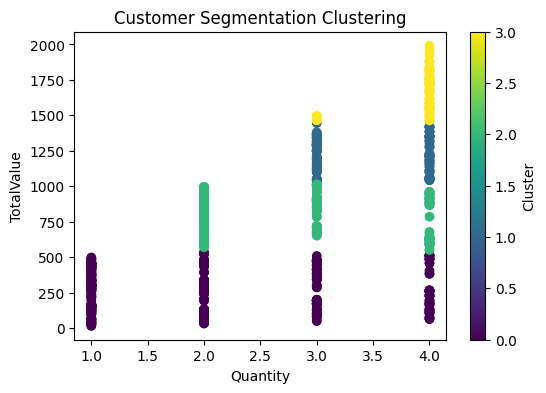

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(cs_df['Quantity'], cs_df['TotalValue'], c=cs_df['Cluster'])
plt.title('Customer Segmentation Clustering')
plt.xlabel('Quantity')
plt.ylabel('TotalValue')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(X, cs_df['Cluster'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.47305676973094346


In [12]:
# Compute SSE for different values of k
sse = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is SSE

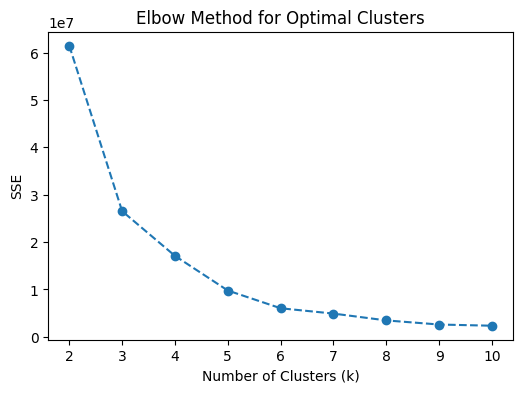

In [13]:
# Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

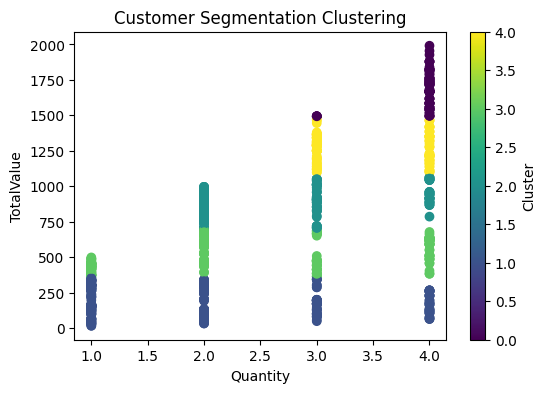

In [14]:
X_5 = cs_df[['Reg','Quantity','TotalValue']]

km = KMeans(n_clusters=5)
km

cs_df['Cluster_after_Elbow_Plot'] = km.fit_predict(X_5)
cs_df

plt.figure(figsize=(6, 4))
plt.scatter(cs_df['Quantity'], cs_df['TotalValue'], c=cs_df['Cluster_after_Elbow_Plot'])
plt.title('Customer Segmentation Clustering')
plt.xlabel('Quantity')
plt.ylabel('TotalValue')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(X_5, cs_df['Cluster_after_Elbow_Plot'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.48846437914109264


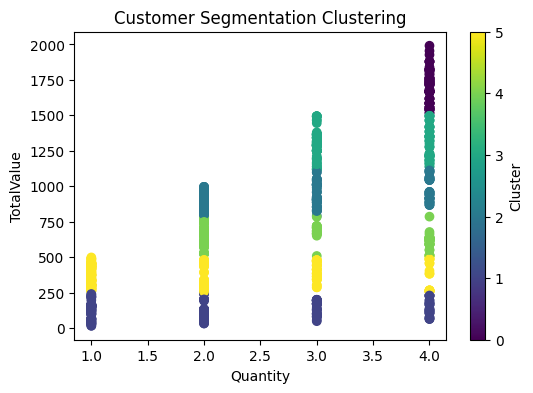

In [16]:
X_6 = cs_df[['Reg','Quantity','TotalValue']]

km = KMeans(n_clusters=6)
km

cs_df['Cluster_6'] = km.fit_predict(X_6)
cs_df

plt.figure(figsize=(6, 4))
plt.scatter(cs_df['Quantity'], cs_df['TotalValue'], c=cs_df['Cluster_6'])
plt.title('Customer Segmentation Clustering')
plt.xlabel('Quantity')
plt.ylabel('TotalValue')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
from sklearn.metrics import davies_bouldin_score

# Calculate DB Index
db_index = davies_bouldin_score(X_6, cs_df['Cluster_6'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.43944555837385263


In [18]:
# Find the average TotalValue per cluster
cluster_summary = cs_df.groupby('Cluster_6')[['Quantity', 'TotalValue']].mean()
cluster_summary

,Quantity,TotalValue
Cluster_6,,
0,4.000000,1703.019753
1,2.024752,130.352030
2,2.838150,928.976532
3,3.374101,1299.173453
4,2.765625,644.913984
5,1.768953,367.771877


In [19]:
# Identify high-value clusters
high_value_cluster = cluster_summary['TotalValue'].idxmax()
high_value_customers = cs_df[cs_df['Cluster_6'] == high_value_cluster]
high_value_customers

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Reg,Cluster,Cluster_after_Elbow_Plot,Cluster_6
27,C0006,Brittany Palmer,South America,2024-01-07,T00259,P020,2024-01-25 09:29:44,4,1585.36,396.34,1,3,0,0
55,C0012,Kevin May,South America,2024-08-07,T00094,P041,2024-07-14 19:37:54,4,1825.12,456.28,1,3,0,0
62,C0013,Lauren Buchanan,South America,2024-05-19,T00503,P017,2024-07-26 00:21:59,4,1879.08,469.77,1,3,0,0
65,C0013,Lauren Buchanan,South America,2024-05-19,T00627,P020,2024-05-06 23:15:01,4,1585.36,396.34,1,3,0,0
72,C0016,Emily Woods,North America,2024-01-03,T00722,P018,2024-07-31 05:19:54,4,1747.56,436.89,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,C0187,Kayla Kelly,South America,2024-08-02,T00870,P018,2024-05-02 14:16:38,4,1747.56,436.89,1,3,0,0
942,C0188,Anna Ball,South America,2022-05-17,T00694,P076,2024-06-30 08:52:10,4,1717.16,429.29,1,3,0,0
983,C0196,Laura Watts,Europe,2022-06-07,T00212,P020,2024-12-03 12:54:48,4,1585.36,396.34,4,3,0,0
985,C0196,Laura Watts,Europe,2022-06-07,T00575,P079,2024-12-15 03:43:35,4,1669.48,417.37,4,3,0,0
